In [73]:
##import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [74]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)
# y = 0.8x^2 + 0.9x + 2

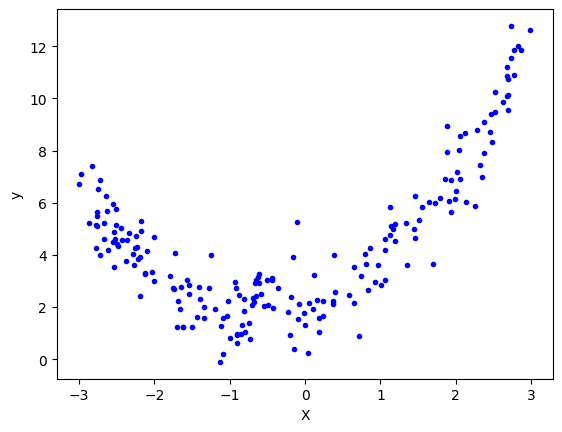

In [75]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [77]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.43217906332207723

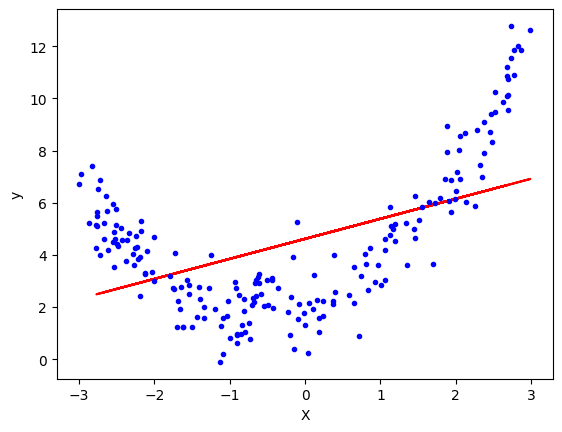

In [80]:
plt.plot(X_test,lr.predict(X_test),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()
# Below you are seeing that, line is not up to the mark with the curve. due to the polynomial data.
# which says we can not directly use the linear regression on polynomial data.

In [81]:
#Let's apply polynomial linear regression
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
print(X_train[0])
print(X_train_trans[0])
print(y_train[0])

[-2.63396446]
[ 1.         -2.63396446  6.93776879]
[5.69415976]


In [82]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
y_predict = lr.predict(X_test_trans)

In [84]:
r2_score(y_test, y_predict)

0.9201244071438377

In [85]:
print(lr.coef_) # we got 3 values due to the degree 2 used. [[0. 0.96243184(x) 0.79410203(x^2)]]
print(lr.intercept_)

[[0.         0.91241078 0.82284937]]
[2.0148024]


In [58]:
# Prepares new sample data from predictions between -3 and 3
X_new=np.linspace(-3, 3, 40).reshape(40, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

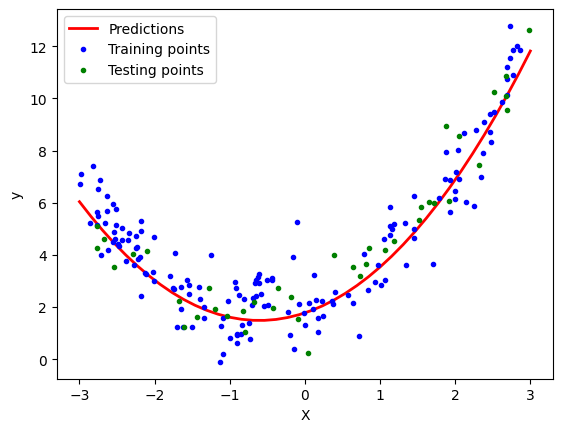

In [90]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show() # 070422 66699